In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def modelo_generador():
  modelo = tf.keras.Sequential()
  modelo.add(tf.keras.layers.Input(shape=(NOISE_SIZE,)))

  modelo.add(tf.keras.layers.Dense(10, activation='relu'))
  #modelo.add(tf.keras.layers.Dropout(0.2))


  modelo.add(tf.keras.layers.Dense(SAMPLING_SIZE, activation='sigmoid'))

  return modelo

def modelo_discriminador():
  modelo = tf.keras.Sequential()
  modelo.add(tf.keras.layers.Input(shape=(SAMPLING_SIZE,)))

  modelo.add(tf.keras.layers.Dense(10, activation='relu'))
 # modelo.add(tf.keras.layers.Dropout(0.2))


  modelo.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  return modelo

In [3]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)
def loss_generador(critica):
  return cross_entropy(critica, tf.ones_like(critica))

def loss_discriminador(critica_falsa, critica_verdadera):
  return (cross_entropy(critica_falsa, tf.zeros_like(critica_falsa))+cross_entropy(critica_verdadera, tf.ones_like(critica_verdadera)))/2

In [4]:
def train_step():
  for i in range(int(INITIAL_SET_SIZE/BATCH_SIZE)):
    batch_rand = np.random.normal(size=(BATCH_SIZE, NOISE_SIZE))
    batch_verdadera = initial_set[i*BATCH_SIZE:i*BATCH_SIZE+BATCH_SIZE]
    with tf.GradientTape() as gtape, tf.GradientTape() as dtape:
      batch_falsa = generador(batch_rand, training=True)
      critica_falsa = discriminador(batch_falsa, training=True)
      critica_verdadera = discriminador(batch_verdadera, training=True)      
      loss_gen = loss_generador(critica_falsa)
      loss_disc = loss_discriminador(critica_falsa, critica_verdadera)

    gradient_gen = gtape.gradient(loss_gen, generador.trainable_variables)
    gradient_disc = dtape.gradient(loss_disc, discriminador.trainable_variables)

    gen_optimizer.apply_gradients(zip(gradient_gen, generador.trainable_variables))
    disc_optimizer.apply_gradients(zip(gradient_disc, discriminador.trainable_variables))
  return loss_gen, loss_disc

In [5]:
## cantidades constantes
EPOCHS = 10
BATCH_SIZE = 100
NOISE_SIZE = 100

INITIAL_SET_SIZE = 10000
SAMPLING_SIZE = 1000

initial_set=np.random.binomial(n=100, p=0.25, size=(INITIAL_SET_SIZE, SAMPLING_SIZE))/100

print(np.shape(initial_set))

(10000, 1000)


In [ ]:
def rate_penalizacion(x):
  #return 10*(np.tanh(-x)+1)/2
  return 1

In [ ]:
generador=modelo_generador()
discriminador = modelo_discriminador()

In [ ]:
gen_optimizer = tf.keras.optimizers.Adam(1e-4)
disc_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
for epoch in range(EPOCHS):
  np.random.shuffle(initial_set)
  loss_gen, loss_disc = train_step()

  dist_test = generador(np.random.normal(size=(1000, NOISE_SIZE)), training=False)
  critica_test = discriminador(dist_test, training=False)
  n_fools = 0
  for i in critica_test.numpy().flatten():
    if i>0.5:
      n_fools = n_fools+1

  print(f"{epoch+1}\t{loss_gen.numpy()}\t{loss_disc.numpy()}\t{loss_gen.numpy()/loss_disc.numpy()}\t{100*n_fools/1000} %")

1	7.512937068939209	7.297342300415039	1.0295442342758179	53.3 %
2	5.024623870849609	8.14578628540039	0.616837203502655	89.4 %
3	0.6935588121414185	7.798733234405518	0.08893223851919174	100.0 %
4	0.3719264268875122	7.704154014587402	0.04827608913183212	100.0 %
5	0.1867390275001526	7.727394104003906	0.024165848270058632	100.0 %
6	0.19484922289848328	7.694051265716553	0.025324659422039986	100.0 %
7	0.11566141247749329	7.715994834899902	0.014989824965596199	100.0 %
8	0.10175137221813202	7.712111949920654	0.013193710707128048	100.0 %
9	0.09229950606822968	7.7092461585998535	0.011972571723163128	100.0 %
10	0.058655399829149246	7.720524787902832	0.007597333285957575	100.0 %


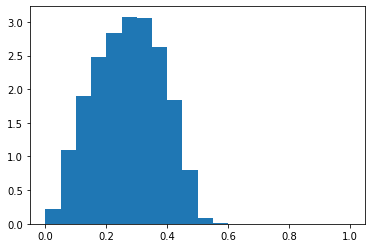

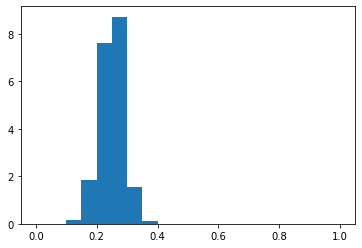

In [ ]:
dist_test = generador(np.random.normal(size=(1000, NOISE_SIZE)), training=False)

plt.hist(dist_test.numpy().flatten(), range=(0, 1), bins=20, density=True)
plt.show()

plt.hist(np.random.binomial(n=100, p=0.25, size=1000)/100, range=(0, 1), bins=20, density=True)
plt.show()